In [5]:
import dlib
import cv2
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow

In [6]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/CS302_Final')

Mounted at /content/drive


In [24]:
## Note: This jupyternotebook is written in google colab, lines should be modified to run in loacl
## face alignment code is credited from Adrian Rosebrock, https://pyimagesearch.com/2017/05/22/face-alignment-with-opencv-and-python/

## Data collection

In [27]:
import numpy as np

# load the data
with open('x_2e.npy', 'rb') as np_file:
    X = np.load(np_file, allow_pickle=True)

with open('y_2e.npy', 'rb') as np_file:
    y = np.load(np_file, allow_pickle=True) 

Work with single image

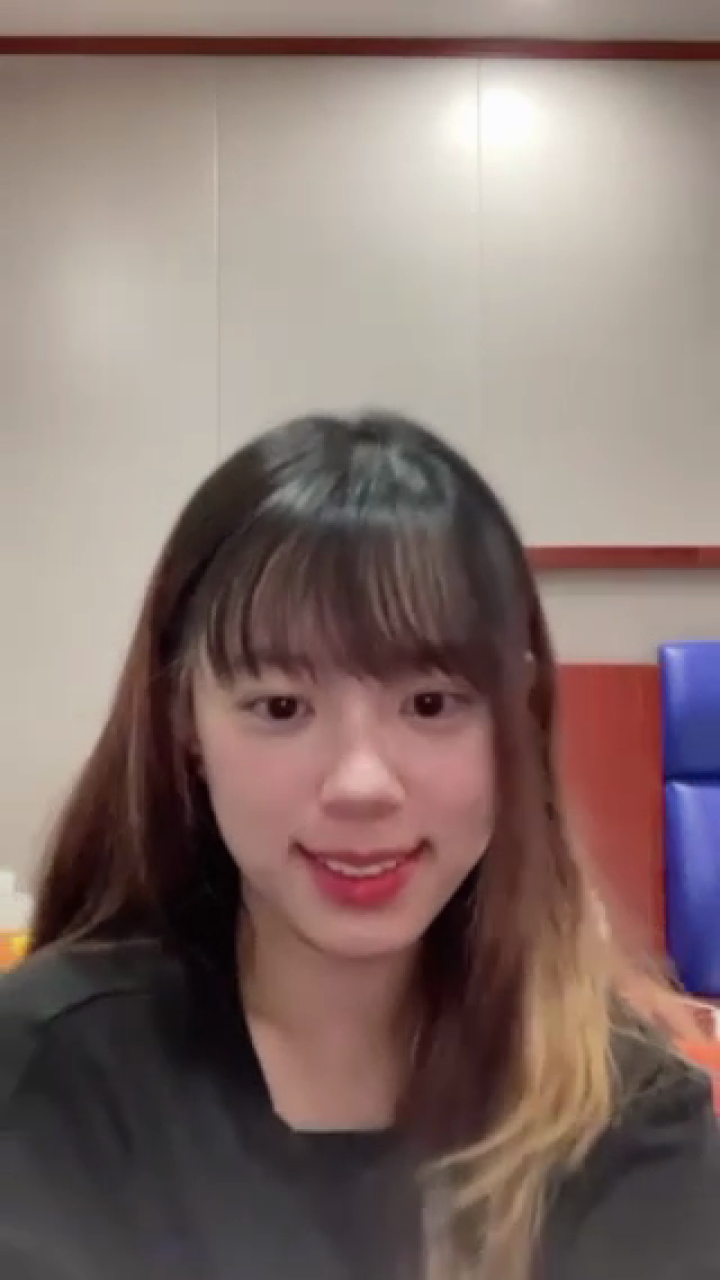

In [20]:
# single image
image = X[70]

cv2_imshow(image)

## Face detection

In [97]:
from skimage.io import imread
from skimage import filters
from skimage import io
from skimage.color import rgb2gray

In [3]:
import cv2
import imutils
import dlib
import numpy as np
from imutils.face_utils import FaceAligner
from imutils import face_utils

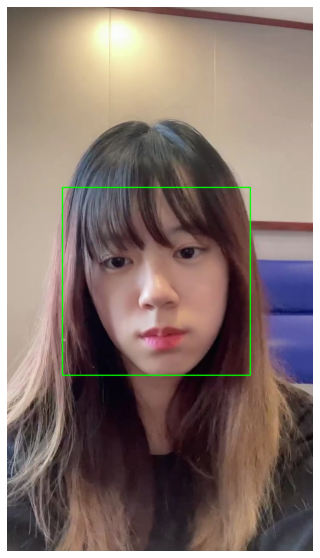

In [28]:
# face detection with haar casscade

face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# working with single image
img = X[470]
img_raw = img.copy()

# detect face with haar cascade
faces = face_detector.detectMultiScale(img, 1.3, 5)
face_x, face_y, face_w, face_h = faces[0]

# rectangular for the detected face

cv2.rectangle(img, (face_x, face_y), (face_x + face_w, face_y + face_h), (0, 255, 0), 2)

plt.figure(figsize = (10, 10))
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

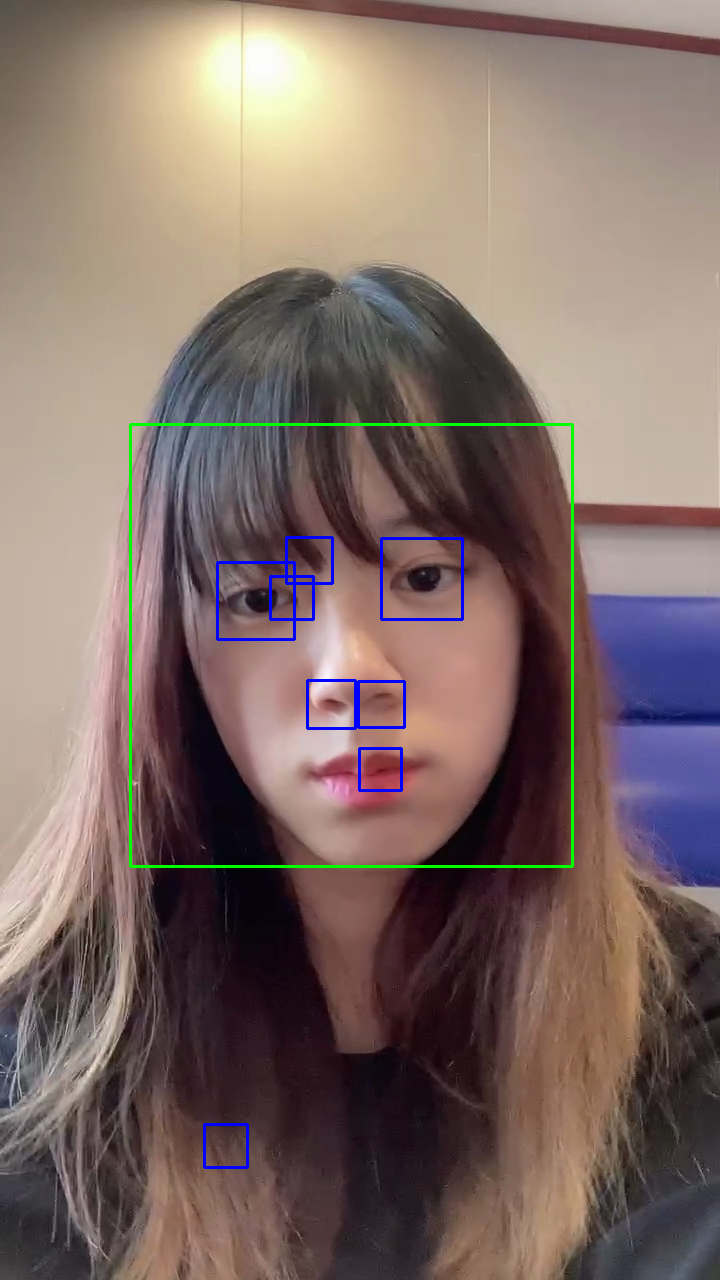

In [29]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# eye detection (a lot false positive result)
eyes = eye_detector.detectMultiScale(img_gray)
 
for (eye_x, eye_y, eye_w, eye_h) in eyes:
   cv2.rectangle(img,(eye_x, eye_y),(eye_x+eye_w, eye_y+eye_h), (255,0,0), 2)

cv2_imshow(img)

In [172]:
from imutils.face_utils import rect_to_bb

# face alignemnt

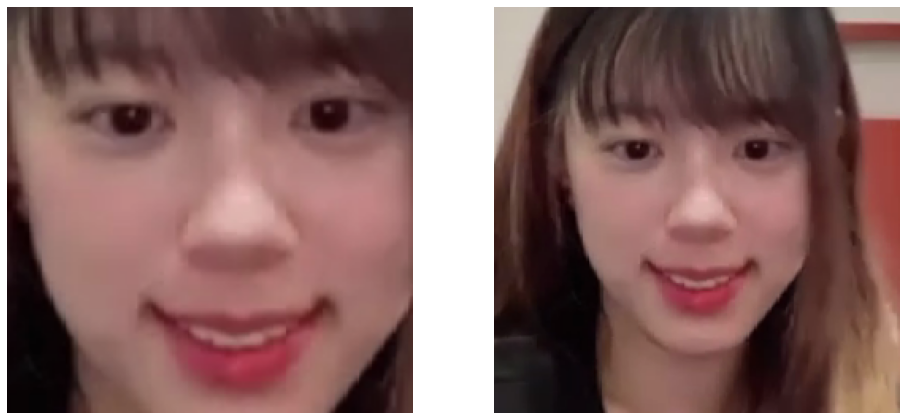

In [30]:
# face detection and face alignemnt with HOG

# resize the image
image = imutils.resize(image, width=800)

# face alignment work with gray value
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# HOG face detector
detector = dlib.get_frontal_face_detector()

# facial lankmark detect initial model
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
face_aligned = FaceAligner(predictor, desiredFaceWidth=256)

rects = detector(gray, 2)

# extract the ROI, then align the face
for rect in rects:

	# ROI
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	faceOrig = imutils.resize(image[y:y + h, x:x + w], width=256)
 
  # align the face 
	faceAligned = face_aligned.align(image, gray, rect)
 
	# display the output images
	plt.figure(figsize = (16, 16))
	plt.subplot(121)
	plt.imshow(faceOrig[:, :, [2, 1, 0]])
	plt.axis('off')

	plt.subplot(122)
	plt.imshow(faceAligned[:, :, [2, 1, 0]])
	plt.axis('off')
	plt.show()

# facial landmark

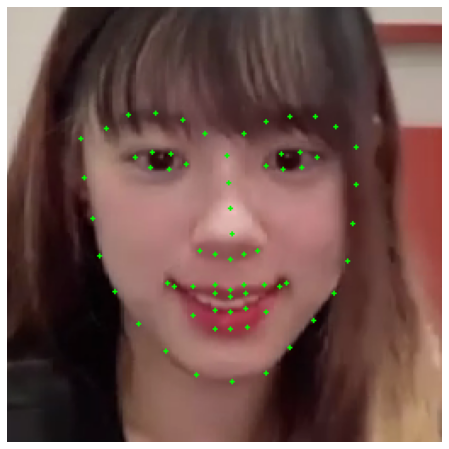

In [31]:
# facial landmark with Gradient boost tree

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
points = detector(faceAligned, 1)

for k, d in enumerate(points):
    landmarks = predictor(faceAligned, d)

    # draw the facial landmark
    for p in landmarks.parts():
      cv2.circle(faceAligned, (p.x, p.y), 1, (0, 255, 0), -1)


plt.figure(figsize = (8, 8))
plt.imshow(faceAligned[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

# feature extraction

In [22]:
import math
from math import atan2,degrees

In [23]:
def get_feature(landmarks):

  # Standardization
  Standardization = math.sqrt((landmarks.part(27).x - landmarks.part(28).x)**2 + (landmarks.part(27).y - landmarks.part(28).y)**2)

  # mouth width
  d1 = math.sqrt((landmarks.part(48).x - landmarks.part(54).x)**2 + (landmarks.part(48).y - landmarks.part(54).y)**2)
  d1/=Standardization

  # mouth height_1
  d2 = math.sqrt((landmarks.part(49).x - landmarks.part(59).x)**2 + (landmarks.part(49).y - landmarks.part(59).y)**2)
  d2/=Standardization

  # mouth hieght_2
  d3 = math.sqrt((landmarks.part(50).x - landmarks.part(58).x)**2 + (landmarks.part(50).y - landmarks.part(58).y)**2)
  d3/=Standardization

  # mouth hieght_3
  d4 = math.sqrt((landmarks.part(51).x - landmarks.part(57).x)**2 + (landmarks.part(51).y - landmarks.part(57).y)**2)
  d4/=Standardization

  # mouth height_4
  d5 = math.sqrt((landmarks.part(52).x - landmarks.part(56).x)**2 + (landmarks.part(52).y - landmarks.part(56).y)**2)
  d5/=Standardization

  # mouth height_5
  d6 = math.sqrt((landmarks.part(53).x - landmarks.part(55).x)**2 + (landmarks.part(53).y - landmarks.part(55).y)**2)
  d6/=Standardization

  # eye height
  d7 = math.sqrt((landmarks.part(37).x - landmarks.part(40).x)**2 + (landmarks.part(37).y - landmarks.part(40).y)**2)
  d7/=Standardization

  # nose mouth_left degree
  delta_x = landmarks.part(30).x - landmarks.part(48).x
  delta_y = landmarks.part(30).y - landmarks.part(48).y
  degree = degrees(atan2(delta_y,delta_x))

  return d1, d2, d3, d4, d5, d6, d7, degree

# Feature extraction from all data

In [ ]:
# create a new array to store the features
X_new = np.zeros((X.shape[0],8))
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
face_aligned = FaceAligner(predictor, desiredFaceWidth=256)

for i in range(X.shape[0]):

  image = X[i]
  image = imutils.resize(image, width=800)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  rects = detector(gray, 2)

  # extract the ROI, then align the face
  for rect in rects:
    # ROI
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    faceOrig = imutils.resize(image[y:y + h, x:x + w], width=256)

    # face alingment
    faceAligned = face_aligned.align(image, gray, rect)
  
  # facial landmark model
  points = detector(faceAligned, 1)

  # facial landmakrs
  for k, d in enumerate(points):
    landmarks = predictor(image, d)
  
  X_new[i] = get_feature(landmarks)

# train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=4)

# Grid search for SVM

In [35]:
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

In [36]:
# Grid search for SVC
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(kernel):
    if kernel == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif kernel == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif kernel == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif kernel == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

# Model evaluation

In [132]:
for i in range(4):
    print(i)
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

0
Evaluation: Polynomial kernel
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00        73

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

1
Evaluation: RBF kernel
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        76
         1.0       0.94      0.99      0.96        73

    accuracy                           0.96       149
   macro avg       0.96      0.96      0.96       149
weighted avg       0.96      0.96      0.96       149

2
Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        76
         1.0       0.49      1.00      0.66        73

    accuracy                           0.49       149
   macro avg       0.24      0.50      0.3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

# Load a test Video

In [39]:
with open('test_2e.npy', 'rb') as np_file:
    X_2e_test = np.load(np_file, allow_pickle=True)

## feature extratcion

In [ ]:
# The steps is same as above
X_test_new = np.zeros((X_2e_test.shape[0],8))
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
face_aligned = FaceAligner(predictor, desiredFaceWidth=256)


for i in range(X_2e_test.shape[0]):

  print(i)
  image = X_2e_test[i]
  image = imutils.resize(image, width=800)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  rects = detector(gray, 2)

  for rect in rects:
    # extract the ROI, then align the face
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    faceOrig = imutils.resize(image[y:y + h, x:x + w], width=256)
    faceAligned = face_aligned.align(image, gray, rect)
  
  points = detector(faceAligned, 1)

  for k, d in enumerate(points):
    landmarks = predictor(image, d)
  
  X_test_new[i] = get_feature(landmarks)

In [41]:
X_test_new

array([[  4.75292308,   1.25      ,   1.8352263 , ...,   1.26106216,
          0.83333333, -56.30993247],
       [  4.7565744 ,   1.25      ,   1.751983  , ...,   1.1785113 ,
          0.85796918, -56.30993247],
       [  4.73650533,   1.2456822 ,   1.74593123, ...,   1.24844731,
          0.89827421, -56.30993247],
       ...,
       [  4.66964191,   1.08333333,   1.6687487 , ...,   1.1785113 ,
          0.90138782, -55.56101069],
       [  4.66964191,   1.08333333,   1.751983  , ...,   1.1785113 ,
          0.90138782, -55.56101069],
       [  4.66964191,   1.08333333,   1.751983  , ...,   1.1785113 ,
          0.90138782, -55.56101069]])

# Use trained model to predict the emotion

In [135]:
svclassifier = getClassifier(3) 
svclassifier.fit(X_train, y_train)
pred = svclassifier.predict(X_test_new)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Put some logo for visulization

In [45]:
# load logo image
angry = cv2.imread("warning.png", cv2.IMREAD_UNCHANGED)
smile = cv2.imread("smile.png", cv2.IMREAD_UNCHANGED)

# resize
angry = cv2.resize(angry, (200, 200), interpolation=cv2.INTER_NEAREST)
smile = cv2.resize(smile, (200, 200), interpolation=cv2.INTER_NEAREST)

x_offset = y_offset=50

y1, y2 = y_offset, y_offset + angry.shape[0]
x1, x2 = x_offset, x_offset + angry.shape[1]

# alpha channal
alpha_angry = angry[:, :, 3] / 255.0
alpha_a_image = 1.0 - alpha_angry

# alpha channal
alpha_smile = smile[:, :, 3] / 255.0
alpha_s_image = 1.0 - alpha_smile

## output test video result

In [49]:
# read in the image as frame to create a gif file
output_pred = []
for i in range(X_2e_test.shape[0]):
  image = X_2e_test[i]
  curr_pred = pred[i]

  if curr_pred == 0:
    for c in range(0,3):
      image[y1:y2, x1:x2, c] = (alpha_smile * smile[:, :, c] + alpha_s_image * image[y1:y2, x1:x2, c])
  
  if curr_pred == 1:
    for c in range(0,3):
      image[y1:y2, x1:x2, c] = (alpha_angry * angry[:, :, c] + alpha_a_image * image[y1:y2, x1:x2, c])

  output_pred.append(image)

In [51]:
import imageio

In [60]:
for i in range(len(output_pred)):
  # change BGR to RGB
  output_pred[i] = output_pred[i][:, :, [2, 1, 0]]

imageio.mimsave('output.gif', output_pred, fps = 10)

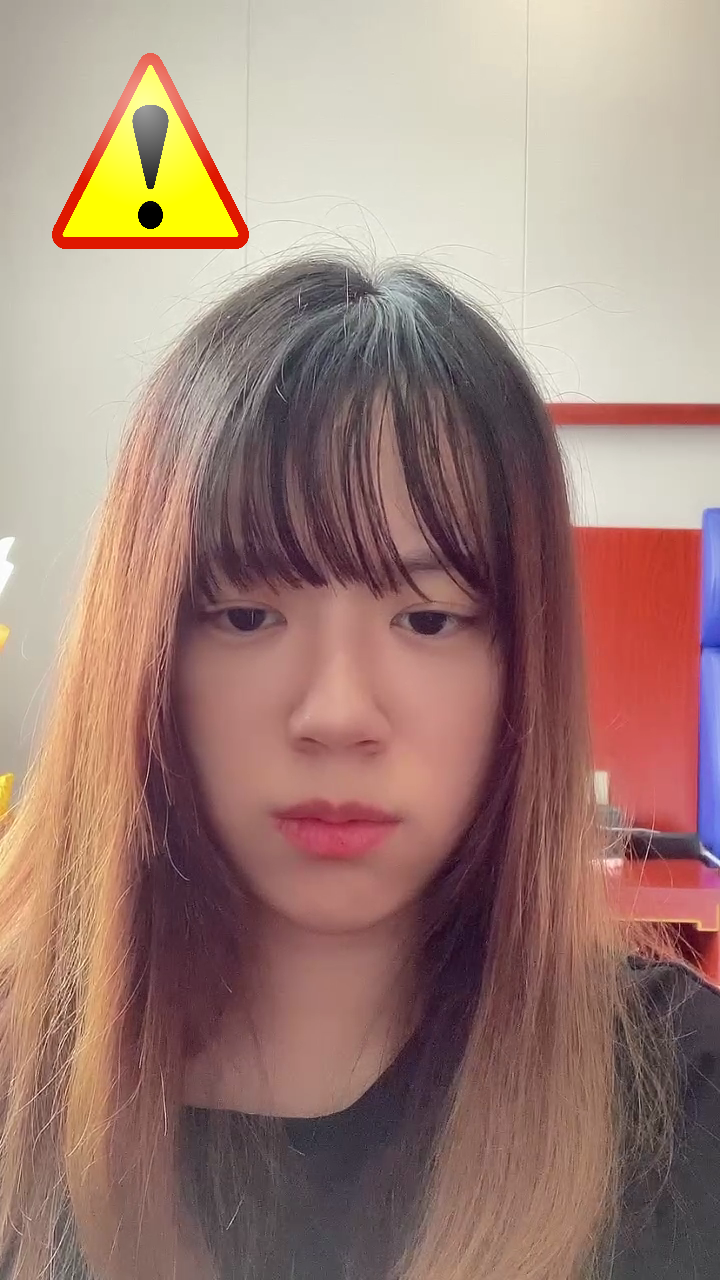

In [121]:
# output of our labeled result
cv2_imshow(output_pred[45][:, :, [2, 1, 0]])